# <center><font color="blue"><b>[DSiP] Diabetes Readmission Prediction</b></font></center>

In [3]:
# Step 1: Import Required Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(os.getcwd())
#os.chdir('C:/Users/amitniti/Downloads')  # Change to the directory where the ZIP file is

C:\


In [5]:
csv_path = 'diabetic_data.csv'  # Replace with your path
df = pd.read_csv(csv_path)

In [7]:
print("Shape of the Dataset:", df.shape)  # (Rows, Columns)
print("\nColumns in the Dataset:\n", df.columns)
print("\nData Types:\n", df.dtypes)

Shape of the Dataset: (101766, 50)

Columns in the Dataset:
 Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
Index(['

In [28]:
print("\nFirst 5 Rows of the Dataset:")
df.head(5)


First 5 Rows of the Dataset:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmission_binary
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [27]:
print("\nLast 5 Rows of the Dataset:\n")
df.tail()


Last 5 Rows of the Dataset:



,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmission_binary
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,1
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,0
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,NO,0


In [7]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())

print("\nSummary Statistics:\n", df.describe(include='all'))

print("\nDataset Information:\n")
df.info()

duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

print("\nUnique Values in Each Column:\n")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Missing Values in Each Column:
 encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride    

### <center><font color="green"><i>Histogram for <u>all/each numerical features</u></i></font></center>

In [14]:
df.select_dtypes(include=['number']).columns

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses'],
      dtype='object')

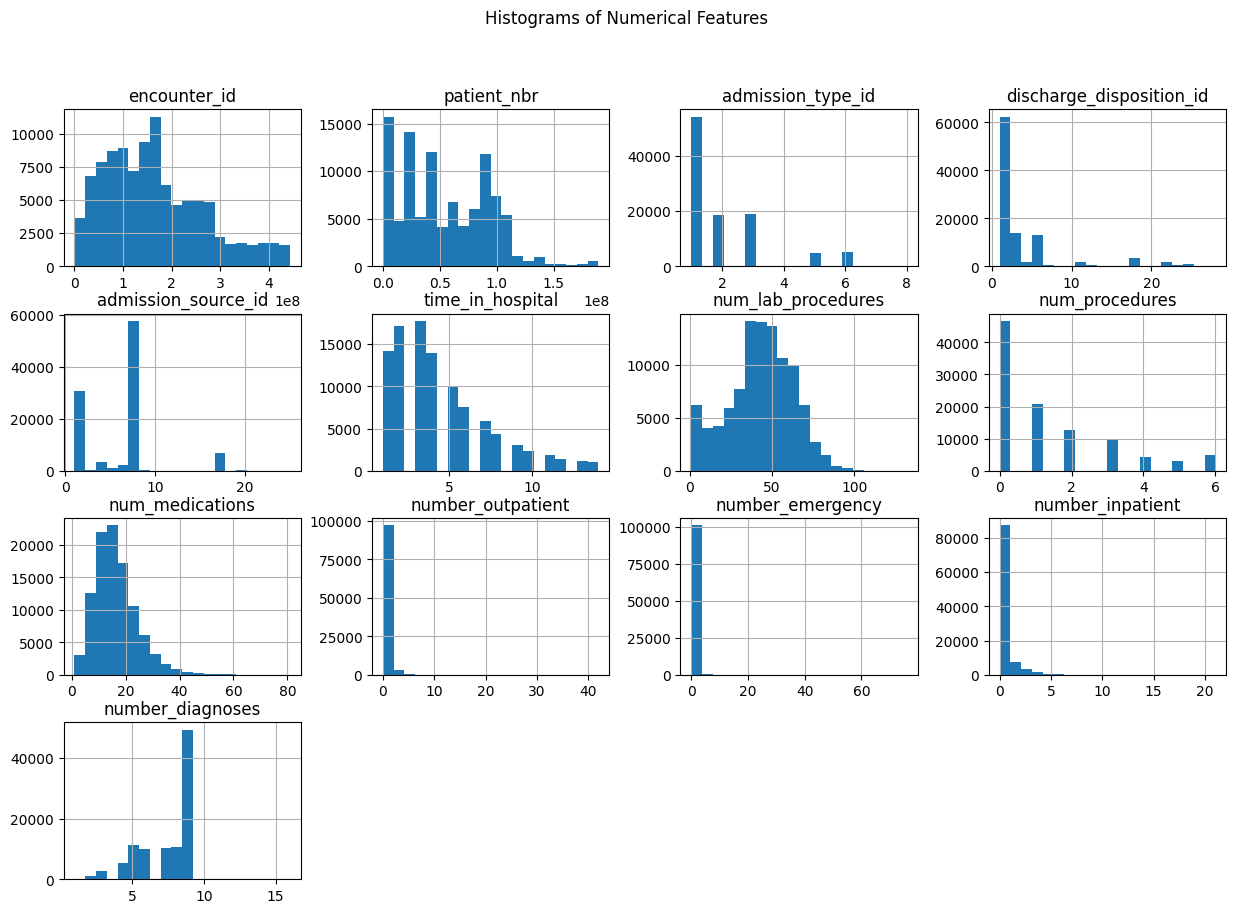

In [10]:
df.select_dtypes(include='number').hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

### <center><font color="green"><i>Heatmap of the Correlation Matrix <br><u>(only numerical columns)</u></i></font></center>

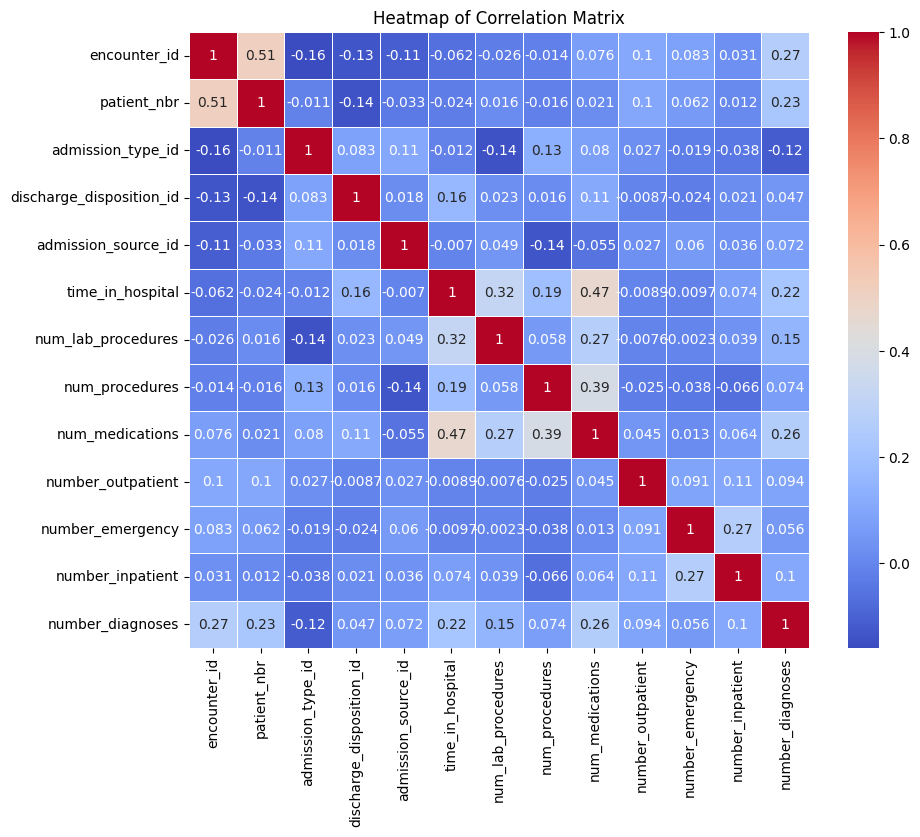

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

#### <left><font color="green"><i>Explaining the above Heatmap of the <u>Correlation Matrix</u></i></font></left>

<div style="color: #4a4a4a; font-family: Arial, sans-serif;">
  <strong></strong><h2 style="color: #2e8b57;">Correlation Matrix Analysis Summary</h2></div>strong>

  <p>The heatmap in the attached image shows the correlation matrix for numerical columns in the <strong style="background-color: #ffd700; padding: 2px;">"diabetic_data.csv (from kaggel.com)"</strong> dataset. Here’s a summary of the insights:</p>

  <h3 style="color: #4682b4;">1. Correlation Scale</h3>
  <ul>
    <li>The heatmap uses a color scale where <strong style="background-color: #ff6347; color: white; padding: 2px;">dark red</strong> indicates a high positive correlation (close to 1), <strong style="background-color: #4169e1; color: white; padding: 2px;">dark blue</strong> indicates a high negative correlation (close to -1), and lighter shades indicate weaker correlations (closer to 0).</li>
    <li>Cells with values close to <strong>1</strong> or <strong>-1</strong> show strong relationships, while values near <strong>0</strong> show little or no correlation.</li>
  </ul>

  <h3 style="color: #4682b4;">2. Key Observations</h3>
  <ul>
    <li><strong style="background-color: #ffd700; padding: 2px;">patient_nbr and encounter_id</strong>: There is a moderate positive correlation (~0.51), which may indicate that multiple encounters could be related to individual patients.</li>
    <li><strong style="background-color: #ffd700; padding: 2px;">num_procedures and number_diagnoses</strong>: There is a moderate correlation (0.74), suggesting that patients with a higher number of diagnoses might undergo more procedures.</li>
    <li><strong style="background-color: #ffd700; padding: 2px;">time_in_hospital and num_medications</strong>: A moderate correlation of 0.47 suggests that a longer hospital stay is associated with a higher number of medications administered.</li>
    <li><strong style="background-color: #ffd700; padding: 2px;">num_lab_procedures and time_in_hospital</strong>: This correlation is around 0.32, indicating that patients with longer hospital stays may have more lab procedures conducted.</li>
    <li><strong style="background-color: #ffd700; padding: 2px;">number_outpatient, number_emergency, and number_inpatient</strong>: These variables have some positive correlations with each other, indicating that patients with more outpatient visits might also have more emergency and inpatient visits, which could be reflective of their overall health condition.</li>
  </ul>

  <h3 style="color: #4682b4;">3. Low Correlation with time_in_hospital</h3>
  <ul>
    <li>Most features, except <strong style="background-color: #ffd700; padding: 2px;">num_medications</strong> and <strong style="background-color: #ffd700; padding: 2px;">num_lab_procedures</strong>, show low correlations with <strong style="background-color: #ffd700; padding: 2px;">time_in_hospital</strong>, indicating that the length of hospital stay may not be highly influenced by other individual numerical factors in this dataset.</li>
  </ul>

  <h3 style="color: #4682b4;">4. Potential Predictive Features</h3>
  <ul>
    <li>Features such as <strong style="background-color: #ffd700; padding: 2px;">num_medications</strong>, <strong style="background-color: #ffd700; padding: 2px;">num_procedures</strong>, <strong style="background-color: #ffd700; padding: 2px;">number_diagnoses</strong>, and <strong style="background-color: #ffd700; padding: 2px;">time_in_hospital</strong> show relatively higher correlations with other factors, which might make them useful for predictive models targeting health outcomes such as readmission.</li>
    <li>Features like <strong style="background-color: #ffd700; padding: 2px;">encounter_id</strong> and <strong style="background-color: #ffd700; padding: 2px;">patient_nbr</strong> likely serve as identifiers and may not carry predictive information.</li>
  </ul>

  <p>This correlation analysis provides a foundational understanding of feature relationships, helping to identify key factors for further analysis or modeling efforts, especially in predicting outcomes like readmission.</p>
</div>

<div style="color: blue;">
  <h3>1. Interpreting the Heatmap</h3>
  <p><strong>Correlation Coefficient:</strong> Values range from -1 to 1:</p>
  <ul>
    <li><strong>1</strong> indicates a perfect positive correlation (as one feature increases, so does the other).</li>
    <li><strong>-1</strong> indicates a perfect negative correlation (as one feature increases, the other decreases).</li>
    <li><strong>0</strong> indicates no correlation.</li>
  </ul>
  <p><strong>Highlighted Cells:</strong> Cells with high correlation values (either positive or negative) show potential relationships between features and can help in identifying multicollinearity, which should be minimized when building models.</p>

  <h3>2. Identifying Features for Readmission Prediction</h3>
  <p>The aim is to find features that have a notable correlation with the readmission variable. Here’s a general approach:</p>
  
  <h4>&nbsp;&nbsp;&nbsp;a. Identify Correlation with Readmission:</h4></tab>
  <p>Check the correlation values of each feature against the target variable, readmission. Features with correlations closer to 1 or -1 (e.g., ≥0.2 or ≤-0.2) are often more predictive.</p>
  
  <h4>&nbsp;&nbsp;&nbsp;b. Remove Highly Correlated Features:</h4>
  <p>Features with high intercorrelations (e.g., ≥0.8) can lead to redundancy and multicollinearity in the model. If two features are highly correlated, consider keeping only one of them for the prediction model to simplify and enhance model interpretability.</p>
  
  <h4>&nbsp;&nbsp;&nbsp;c. Inspect Key Predictive Features:</h4>
  <ul>
    <li><strong>Time in hospital:</strong> This often has a moderate to high correlation with readmission because longer stays could indicate more severe conditions.</li>
    <li><strong>Number of procedures, lab procedures, and medications:</strong> High values in these features can signal increased complexity and severity of cases, possibly leading to higher readmission rates.</li>
    <li><strong>Glucose serum test results and A1c test results:</strong> Abnormal values in these columns may be directly associated with diabetic conditions and could impact readmission.</li>
    <li><strong>Number of inpatient visits, emergency visits, and outpatient visits:</strong> Prior healthcare utilization history is often predictive of future readmissions.</li>
  </ul>

  <h3>3. Example of Column Selection Based on Correlation</h3>
  <p>Below is an example in code to filter out relevant features based on their correlation with the target:</p>
</div>

In [24]:
# Ensure the 'readmission_binary' column exists
if 'readmission_binary' not in df.columns:
    # Convert readmission to a binary outcome (1 if '<30' or '>30', else 0)
    df['readmission_binary'] = df['readmitted'].apply(lambda x: 1 if x in ['<30', '>30'] else 0)

# Now calculate correlations with the 'readmission_binary' column
correlation_matrix = df.select_dtypes(include='number').corr()
readmission_corr = correlation_matrix['readmission_binary'].sort_values(ascending=False)

# Display top features most correlated with readmission
print("Top features correlated with readmission:\n", readmission_corr.head(10))

# Select features with moderate to high correlation (absolute value ≥ 0.2 as an example threshold)
predictive_features = readmission_corr[abs(readmission_corr) >= 0.2].index.tolist()
predictive_features.remove('readmission_binary')  # Remove the target itself

print("Selected predictive features for readmission:\n",predictive_features)

Top features correlated with readmission:
 readmission_binary     1.000000
number_inpatient       0.217194
number_diagnoses       0.112564
number_emergency       0.103011
number_outpatient      0.082142
patient_nbr            0.074093
time_in_hospital       0.051289
num_medications        0.046772
admission_source_id    0.039986
num_lab_procedures     0.039253
Name: readmission_binary, dtype: float64
Selected predictive features for readmission:
 ['number_inpatient']
